<a href="https://colab.research.google.com/github/tecatanka/SWB_Mod_Opt/blob/main/SWB_Tuning_Regression_Continuous_Var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import packages
#from __future__ import absolute_import, division, print_function
#import pathlib
#!pip install -q -U keras-tuner  # pip installation of keras tuner

#Google colab
from google.colab import files

# Importing modules for data processing and plotting
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#Statistical modules
from scipy import stats
import pylab
from sklearn.metrics import mean_squared_error

# Importing modules for neural net creation
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Tensor flow version: ", tf.__version__)

Tensor flow version:  2.12.0


# Regression example using a Neural Net

You are working as an analyst for the biology department of a large academic institution which offers a four-year undergraduate degree program. The academic leaders of the department are interested in understanding how student performance in the final-year examination of the degree program relates to performance in the prior three years.

To help with this, you have been provided with data for 975 individuals graduating in the past three years, and you have been asked to create a model to explain each individual’s final examination score based on their examination scores for the first three years of their program. The Year 1 examination scores are awarded on a scale of 0–100, Years 2 and 3 on a scale of 0–200, and the Final year is awarded on a scale of 0–300.

We will load the ugtests.csv data set into our session

Source: https://peopleanalytics-regression-book.org/linear-reg-ols.html


In [7]:
uploaded = files.upload()

Saving ugtests.csv to ugtests.csv


In [9]:
# Data acquisition



raw_dataset = pd.read_csv("ugtests.csv")

In [10]:
# Create data object to work:

dataset = raw_dataset.copy()
dataset.tail(10) # looking last rows (Note: Python starts indexing with zero 0->974 then 975 data points)

,Yr1,Yr2,Yr3,Final
965,41,89,79,123
966,50,75,159,154
967,64,139,92,165
968,46,55,47,150
969,49,129,109,166
970,78,68,166,176
971,44,61,116,155
972,80,97,121,148
973,37,79,120,178
974,58,135,125,172


# Brief EDA

In [11]:
# Number of rows in data set
num_rows=len(dataset)
num_rows

975

In [13]:
# Number of columns
num_cols=len(dataset.columns)
num_cols

4

In [14]:
# Types of columns
types_cols=dataset.dtypes
types_cols

Yr1      int64
Yr2      int64
Yr3      int64
Final    int64
dtype: object

In [15]:
# Clean data
dataset.isna().sum() #add cells that have no data (NA)


Yr1      0
Yr2      0
Yr3      0
Final    0
dtype: int64

In [16]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Yr1,975.0,52.145641,14.924083,3.0,42.0,53.0,62.0,99.0
Yr2,975.0,92.398974,30.038473,6.0,73.0,94.0,112.0,188.0
Yr3,975.0,105.121026,33.507052,8.0,81.0,105.0,130.0,198.0
Final,975.0,148.962051,44.339663,8.0,118.0,147.0,175.0,295.0


In [17]:
# Create training and test sets

y=dataset.Final
x=dataset.drop('Final', axis=1)
x.head()

,Yr1,Yr2,Yr3
0,27,50,52
1,70,104,126
2,27,36,148
3,26,75,115
4,46,77,75


In [18]:
y.head()

0     93
1    207
2    175
3    125
4    114
Name: Final, dtype: int64

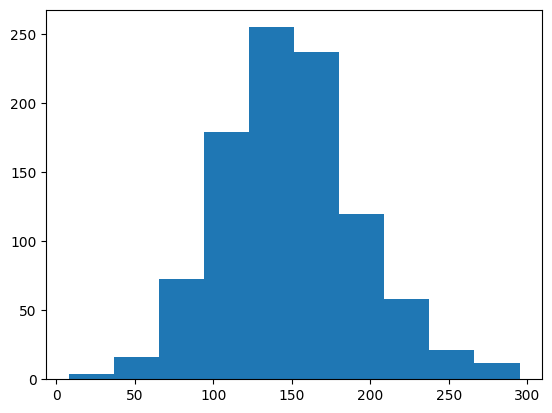

In [21]:
#Histogram of the response variable
plt.hist(y)
plt.show()

In [22]:
# Normality test
norm=stats.normaltest(y)
norm.pvalue

2.1467907677298072e-05

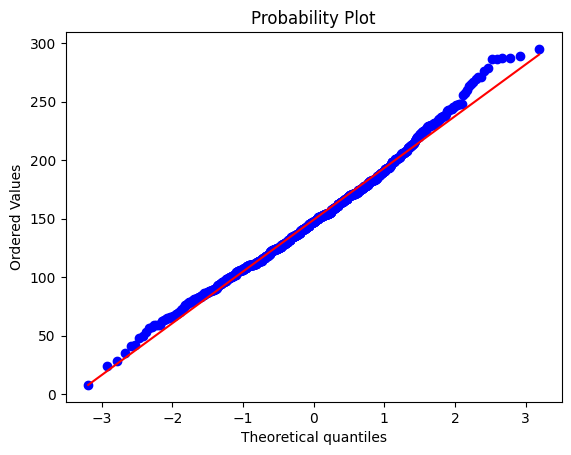

In [23]:
# Q-Q Plot
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [24]:
# Split train and test sets
train_features, test_features, train_label, test_label=train_test_split(x,y,test_size=0.2, random_state=42)


In [25]:
#number of rows train set
train_rows=len(train_features)
train_rows

780

In [26]:
#number of rows test set
test_rows=len(test_features)
test_rows

195

In [27]:
#number of rows train set
y_train_rows=len(train_label)
y_train_rows

780

In [28]:
#number of rows train set
y_test_rows=len(test_label)
y_test_rows

195

In [29]:
# Ranges of values in feature columns
train_features.describe().transpose()[['mean', 'std']]

,mean,std
Yr1,52.105128,14.938100
Yr2,93.406410,29.814578
Yr3,104.551282,33.292514


In [30]:
# Normalize variables via normalization layer in Keras:

#Create normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#Fit state of preprocessing layer to the data
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[ 52.105125  93.40641  104.551285]]


In [31]:
# Example normalizing the first row of features
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[ 49 129 109]]

Normalized: [[-0.21  1.19  0.13]]


In [32]:
train_features.head(1)

,Yr1,Yr2,Yr3
969,49,129,109


# Linear model (simplistic)

In [33]:
# Linear regression with multiple inputs (X's)
# y=mx+b and m is a matrix, b is a vector

#Creating a two-step sequential model with first layer being normalizer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [34]:
# Configure model with Keras
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [35]:
%%time
# Model fit for 100 epochs  (Epoch=complete pass of the training dataset through the algorithm)

history = linear_model.fit(
    train_features,
    train_label,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



CPU times: user 9.6 s, sys: 936 ms, total: 10.5 s
Wall time: 20.9 s


In [36]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)


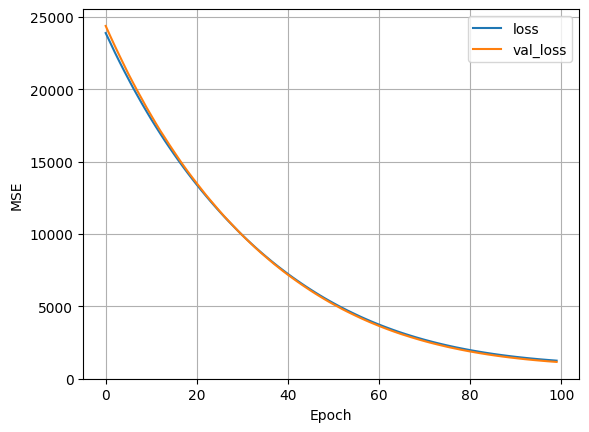

In [37]:
plot_loss(history)


In [38]:
# Collect result for test set
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_label, verbose=0)


7/7 [==============================] - 0s 2ms/step


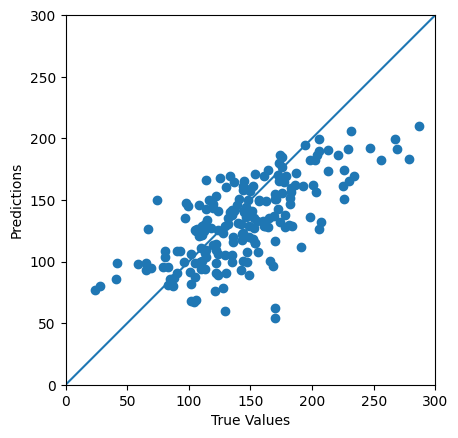

In [39]:
Linear_model_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, Linear_model_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## Performance Simple model

In [40]:
MSE_Linear_model=mean_squared_error(Linear_model_predictions, test_label)
MSE_Linear_model

1273.4455742140267

# Regression using a DNN

Repeating the previous process using MULTIPLE LAYERS. The model's performance slightly improves on the validation dataset: mse


In [41]:
# Creating build and compile function with 2 inner layers
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [42]:
# Regression using a DNN
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                256       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [43]:
%%time
# Train the model

history = dnn_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    verbose=0, epochs=100)


CPU times: user 10.2 s, sys: 678 ms, total: 10.9 s
Wall time: 11 s


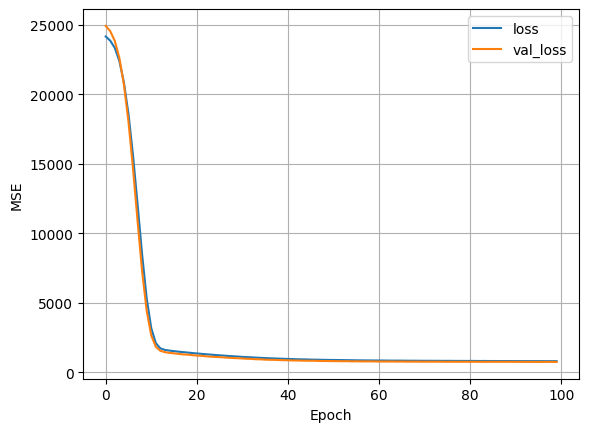

In [44]:
plot_loss(history)


7/7 [==============================] - 0s 3ms/step


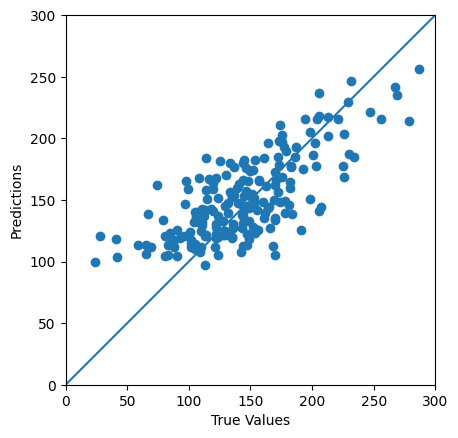

In [45]:
dnn_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, dnn_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



## Performance DNN Model

In [46]:
MSE_DNN=mean_squared_error(dnn_predictions, test_label)
MSE_DNN

997.5729102902276

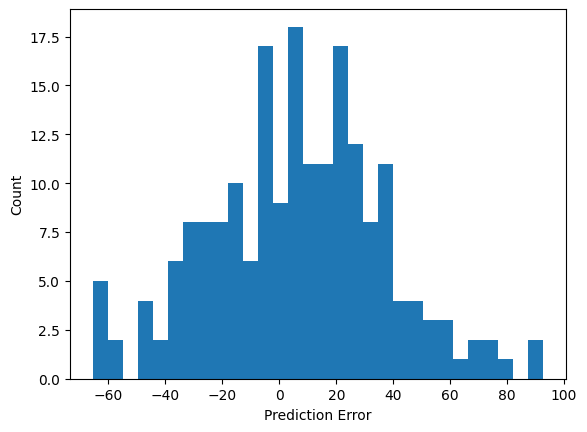

In [47]:
# Error distribution
error = dnn_predictions - test_label
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')


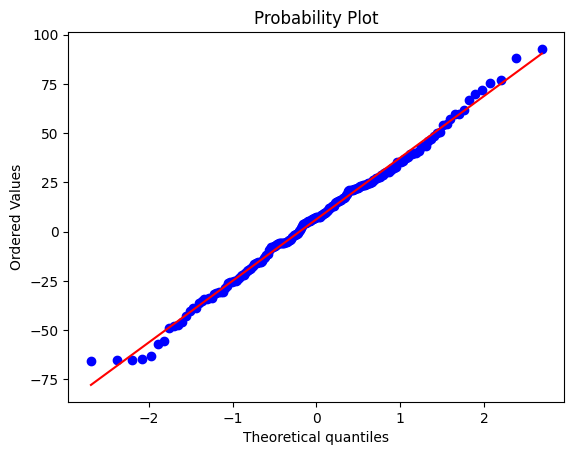

In [48]:
# Q-Q Plot
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

# Hyperparameter Optimization

Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your model. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of the ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

1. Model hyperparameters which influence model selection such as the number and width of hidden layers
2. Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier


In [54]:
!pip install keras-tuner --upgrade

import keras_tuner as kt
from numpy.random import seed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.7 MB/s eta 0:00:00


In [56]:
#Function that return Keras model (changing only the value of the learning rate and nodes per layer)

def build_hp_model(hp):
    model = keras.Sequential([normalizer])
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(1))
    hp_learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1])
    model.compile(loss='mse', metrics=['mse'],
                  optimizer=tf.keras.optimizers.Adam(hp_learning_rate))
    return model

## Random Search Tuner

In [57]:
# Random search set up

tuner_rs=kt.RandomSearch(
    build_hp_model,
    objective='val_loss',
    seed=42,
    max_trials=10,
    overwrite=True)
    #project_name="SWB_one"
    #directory='random_search')



In [58]:
tuner_rs.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [59]:
%%time
# Run Random search

tuner_rs.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)

Trial 10 Complete [00h 00m 21s]
val_loss: 23260.41015625

Best val_loss So Far: 737.26171875
Total elapsed time: 00h 03m 39s
CPU times: user 2min 28s, sys: 9.32 s, total: 2min 38s
Wall time: 3min 38s


In [60]:
#Save best hyperparameters
best_rs=tuner_rs.get_best_hyperparameters()[0]
# Build model with best parameters
hrs_model = tuner_rs.hypermodel.build(best_rs)
hrs_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 360
Trainable params: 353
Non-trainable params: 7
_________________________________________________________________


In [61]:
best_rs.values

{'units': 16, 'learning_rate': 0.005}

CPU times: user 10.7 s, sys: 673 ms, total: 11.3 s
Wall time: 11 s


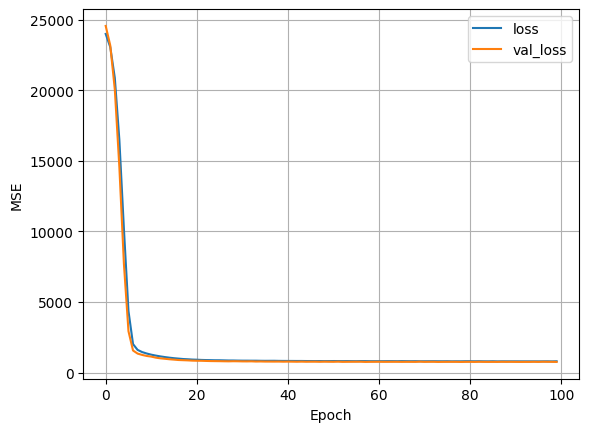

In [62]:
%%time

plot_loss(hrs_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0, use_multiprocessing=True))

7/7 [==============================] - 0s 2ms/step


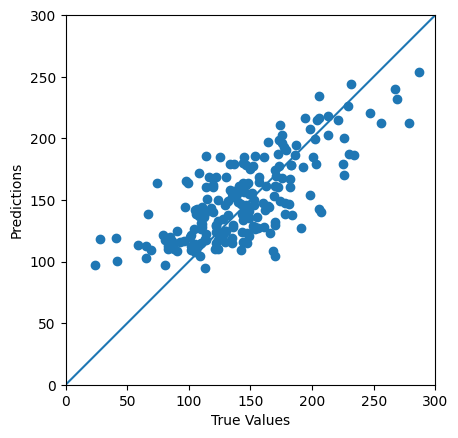

In [63]:
hrs_predictions = hrs_model.predict(test_features).flatten()

hrs = plt.axes(aspect='equal')
plt.scatter(test_label, hrs_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Random Search

In [64]:
MSE_RS=mean_squared_error(hrs_predictions, test_label)
MSE_RS

999.2831376449865

## Hyperband tuning

In [65]:
tuner_hBand = kt.Hyperband(
    build_hp_model,
    objective='val_loss',
    max_epochs=10,
    hyperband_iterations=2,
    overwrite=True)

In [66]:
tuner_hBand.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [67]:
%%time
#Perform Tuning with Hyperband
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
tuner_hBand.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,
                  callbacks=[stop_early],  use_multiprocessing=True)

Trial 59 Complete [00h 00m 04s]
val_loss: 24790.576171875

Best val_loss So Far: 723.1700439453125
Total elapsed time: 00h 02m 29s
CPU times: user 2min 17s, sys: 3.65 s, total: 2min 21s
Wall time: 2min 28s


In [68]:
#Save best hyperparameters
best_hBand=tuner_hBand.get_best_hyperparameters()[0]

In [69]:
best_hBand.values

{'units': 128,
 'learning_rate': 0.05,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,160
Trainable params: 17,153
Non-trainable params: 7
_________________________________________________________________


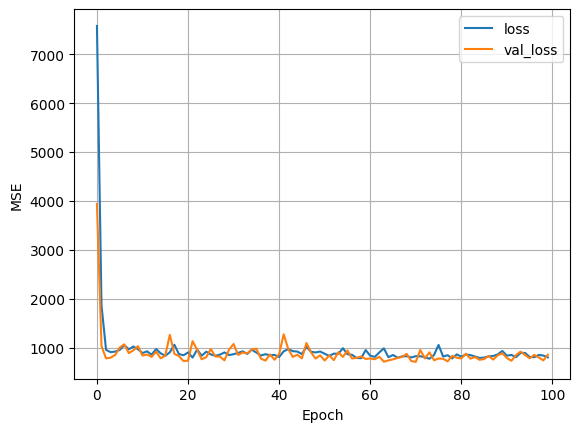

In [70]:
# Build model with best parameters
hBand_model = tuner_hBand.hypermodel.build(best_hBand)
hBand_model.summary()
plot_loss(hBand_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0,  use_multiprocessing=True))

7/7 [==============================] - 0s 2ms/step


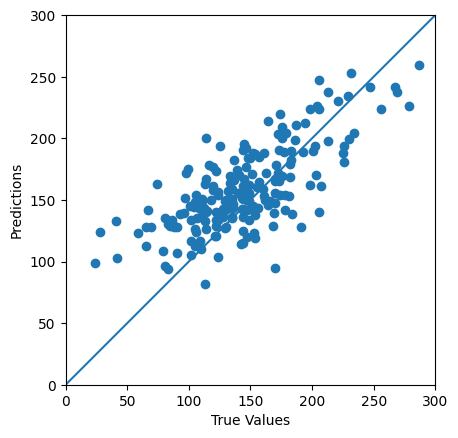

In [71]:
hBand_predictions = hBand_model.predict(test_features).flatten()

hband = plt.axes(aspect='equal')
plt.scatter(test_label, hBand_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Hyperband

In [72]:
MSE_HB=mean_squared_error(hBand_predictions, test_label)
MSE_HB

1195.818653899891

## Bayes Tuning

In [73]:
tuner_Bayes = kt.BayesianOptimization(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=42,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)

In [74]:
tuner_Bayes.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [75]:
%%time
tuner_Bayes.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=0,
                  callbacks=[stop_early], use_multiprocessing=True)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


CPU times: user 2min 4s, sys: 7.68 s, total: 2min 11s
Wall time: 2min 27s


In [76]:
#Save best hyperparameters
best_Bayes=tuner_Bayes.get_best_hyperparameters()[0]
best_Bayes.values

{'units': 16, 'learning_rate': 0.1}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 360
Trainable params: 353
Non-trainable params: 7
_________________________________________________________________


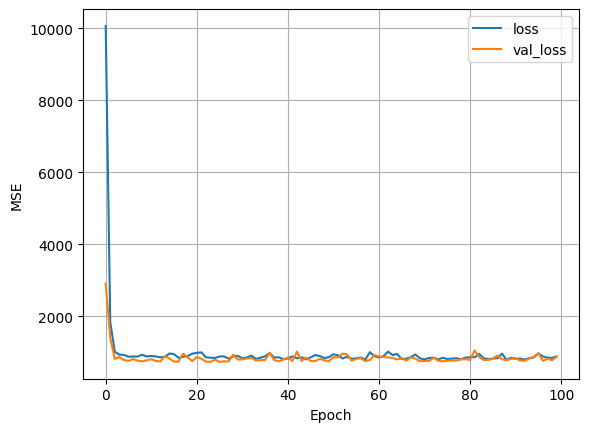

In [77]:
# Build model with best parameters
hBayes_model = tuner_Bayes.hypermodel.build(best_Bayes)
hBayes_model.summary()
plot_loss(hBayes_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0, use_multiprocessing=True))

7/7 [==============================] - 0s 2ms/step


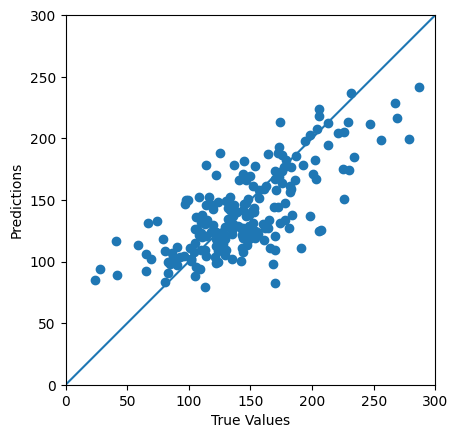

In [78]:
Bayes_predictions = hBayes_model.predict(test_features).flatten()

bayes = plt.axes(aspect='equal')
plt.scatter(test_label, Bayes_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Bayes tuning

In [79]:
MSE_Bayes=mean_squared_error(Bayes_predictions, test_label)
MSE_Bayes

1003.4236784943666

## Grid Search

In [80]:
tunerGrid=kt.GridSearch(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)


In [81]:
tunerGrid.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [82]:
%%time
tunerGrid.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,
                  callbacks=[stop_early], use_multiprocessing=True)

Trial 10 Complete [00h 00m 31s]
val_loss: 19968.93359375

Best val_loss So Far: 717.834716796875
Total elapsed time: 00h 02m 54s
CPU times: user 2min 20s, sys: 9.02 s, total: 2min 29s
Wall time: 2min 54s


In [83]:
#Save best hyperparameters
bestGrid=tunerGrid.get_best_hyperparameters()[0]
bestGrid.values

{'units': 8, 'learning_rate': 0.01}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 32        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 120
Trainable params: 113
Non-trainable params: 7
_________________________________________________________________


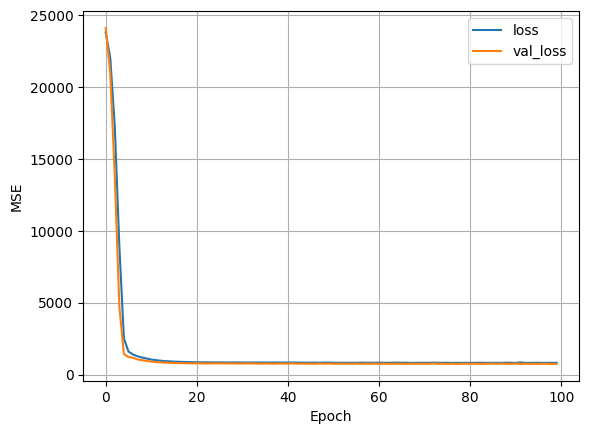

In [84]:
# Build model with best parameters
hGrid_model = tunerGrid.hypermodel.build(bestGrid)
hGrid_model.summary()
plot_loss(hGrid_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0, use_multiprocessing=True))

7/7 [==============================] - 0s 2ms/step


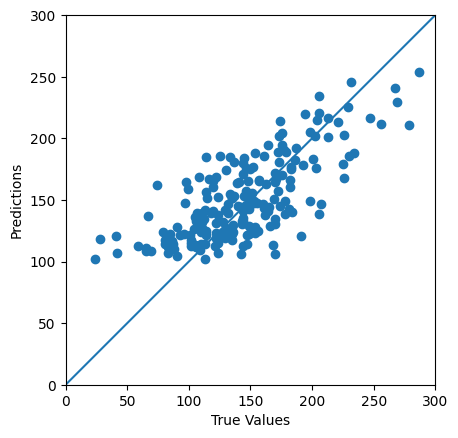

In [85]:
grid_predictions = hGrid_model.predict(test_features).flatten()

grid = plt.axes(aspect='equal')
plt.scatter(test_label, grid_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Grid Tuning

In [87]:
MSE_Grid=mean_squared_error(grid_predictions, test_label)
MSE_Grid

1016.2337820430364

### Summary of Results

In [89]:
Results=[['Simple', MSE_Linear_model], ['NNet', MSE_DNN], ['Random Search', MSE_RS],['Hyperband', MSE_HB],
        ['Bayes Hyp', MSE_Bayes], ['Grid Search', MSE_Grid] ]
Results=pd.DataFrame(Results, columns=['Method', 'MSE'])
Results


,Method,MSE
0,Simple,1273.445574
1,NNet,997.572910
2,Random Search,999.283138
3,Hyperband,1195.818654
4,Bayes Hyp,1003.423678
5,Grid Search,1016.233782
